## <b>Proyecto final</b>
##  <center>"Análisis de clasificación de la transparencia de copa en <html><i>Pseudotsuga menziesii</i></html> con técnicas de aprendizaje automatizado" </center>
## <b>COA-501</b> Herramientas de cómputo para investigadores (R y Python)
## <b>Alumno:</b> Iván Fermín Quiroz Ibáñez
### <b>Correo:</b> <quiroz.ivan@colpos.mx>
### <b>Github</b>: <https://github.com/IFQI91/Proyecto_final_COA501_IFQI.git>
### <b>Dat Linux</b>: <https://datlinux.com>

<img src="./ml.jpg"/>

In [1]:
#directorio de trabajo de binder local
getwd()

[1] "/home/jovyan"

In [2]:
#cargar base de datos
base <- read.csv("/home/jovyan/ABCPE_MIXTO_B1_R_coordenadas.csv")
base$Arbol <- as.factor(base$Arbol)
base$Bloque <- as.factor(base$Bloque)
base$Anio <- as.factor(base$Anio)
base$Muestreo <- as.factor((base$Muestreo))
base$Fungicida<- as.factor((base$Fungicida))
base$Nutrimento <- as.factor((base$Nutrimento))
base$DDA <- as.factor((base$DDA))
base$trat <- as.factor((base$trat))
base$AltRan <- as.factor((base$AltRan))

In [3]:
#Base de datos dinámica
library(DT)
datatable(base,
          class="cell border stripe",
          width="600px",
          caption="Base de datos")

HTML widgets cannot be represented in plain text (need html)

### **0) Estudio de caso**
Se cuenta con la base de datos de un experimento realizado en Puebla, dónde se evaluaron los efectos de fertilizantes y plaguicidas contra una enfermedad foliar
conocida como tizón suizo en árboles de navidad de la especie Douglas-fir. Se tomaron
variables como transparencia de copa, severidad, incidencia, longitud de brotes, área de acículas, etc. El objetivo del análisis es determinar la mejor técnica de machine learning o aprendizaje automático (Naive Bayes, K-NN y Random Forest) para clasificar la transparencia de copa en Douglas-fir.

<img src="./tc.jpg"/>

**Variables:**

- Arbol= unidad experimental (UE)
- Bloque= Transparencia de copa asignada como baja,media y alta
- Longitud=  distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º) de la UE
- Latitud= distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º)
- X_UTM= coordenada X en el sistema de coordenadas universal transversal de Mercator
- Y_UTM= coordenada Y en el sistema de coordenadas universal transversal de Mercator
- Altitud= distancia vertical de la UE respecto al nivel del mar
- AltRan= Rango de Altitud de las UE en dos categorías: Alta y Baja
- Fungicida= Tratamiento fungicida (Procloraz, Propiconazol o sin fungicida)
- Nutrimento= Tratamiento fertilizante (Urea, Sulfato de potasio o sin fertilizante)
- Rep= repetición de la UE por tratamiento en un diseño experimental factorial en bloques generalizados
- Muestreo= número de muestreo de follaje (se realizaron 6)
- DDA= días despúes de la aplicación o del establecimiento del experimento
- Anio= edad del follaje o muestra
- AcicR= número de acículas retenidas de rama o muestra
- Abs= Número de cicatrices de acículas de la rama o muestra
- TotalAc= Total de acículas (AcicR + Abs)
- Inc= Incidencia del tizón suizo
- Sevmed= Severidad media del tizón suizo
- Sevmed= Severidad mínima del tizón suizo
- Sevmax= Severidad máxima del tizón suizo
- LonBrot= Longitud de la rama o muestea en centímetros
- indcol= Índice de colonización (Inc * Sevmed)
- Afmed= Área media de acícula (Área de acículas en centímetros cuadrados por muestra)
- Afmax= Área máxima de acícula por muestra
- Afmin= Área mínima de acícula por muestra
- Aftotal=  Suma de área de acículas por muestra
- CA= Abs expresada en porcentaje (Abs*100/TotalAC)
- RA= RA expresada en porcentaje (RA*100/TotalAC)
- Color= Categorías de color por cada muestra (Verde claro, verde oscuro y rojizo)
- trat= Interacción de tratamientos (Fungicida*Nutrimento)
- ABCPEIC= Área bajo la curva progreso de la enfermedad con el índice de colonización

### **1) Base de datos y AED**

     Arbol       Bloque       Longitud         Latitud          X_UTM       
 1      : 12   Alta :216   Min.   :-97.99   Min.   :19.72   Min.   :605708  
 2      : 12   Baja :216   1st Qu.:-97.99   1st Qu.:19.72   1st Qu.:605724  
 3      : 12   Media:216   Median :-97.99   Median :19.72   Median :605732  
 4      : 12               Mean   :-97.99   Mean   :19.72   Mean   :605732  
 5      : 12               3rd Qu.:-97.99   3rd Qu.:19.72   3rd Qu.:605741  
 6      : 12               Max.   :-97.99   Max.   :19.72   Max.   :605759  
 (Other):576                                                                
     Y_UTM            Altitud      AltRan    Fungicida Nutrimento      Rep     
 Min.   :2180985   Min.   :2973   Alta:312   1:216     1:216      Min.   :1.0  
 1st Qu.:2181009   1st Qu.:2979   Baja:336   2:216     2:216      1st Qu.:1.0  
 Median :2181025   Median :2982              3:216     3:216      Median :1.5  
 Mean   :2181027   Mean   :2985                                 

[1] "data.frame"

'data.frame':	648 obs. of  32 variables:
 $ Arbol     : Factor w/ 54 levels "1","2","3","4",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Bloque    : Factor w/ 3 levels "Alta","Baja",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Longitud  : num  -98 -98 -98 -98 -98 ...
 $ Latitud   : num  19.7 19.7 19.7 19.7 19.7 ...
 $ X_UTM     : num  605748 605744 605740 605754 605742 ...
 $ Y_UTM     : num  2181070 2181057 2181039 2181034 2181026 ...
 $ Altitud   : num  2979 2979 2980 2980 2984 ...
 $ AltRan    : Factor w/ 2 levels "Alta","Baja": 2 2 2 2 2 1 1 1 1 1 ...
 $ Fungicida : Factor w/ 3 levels "1","2","3": 1 1 2 1 2 1 1 2 2 3 ...
 $ Nutrimento: Factor w/ 3 levels "1","2","3": 1 2 2 2 1 3 3 3 2 1 ...
 $ Rep       : int  1 1 1 2 1 1 2 1 2 1 ...
 $ Muestreo  : Factor w/ 6 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ DDA       : Factor w/ 6 levels "0","63","91",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Anio      : Factor w/ 2 levels "2016","2017": 1 1 1 1 1 1 1 1 1 1 ...
 $ AcicR     : int  74 129 69 33 98 71 68 44 92 92 .

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



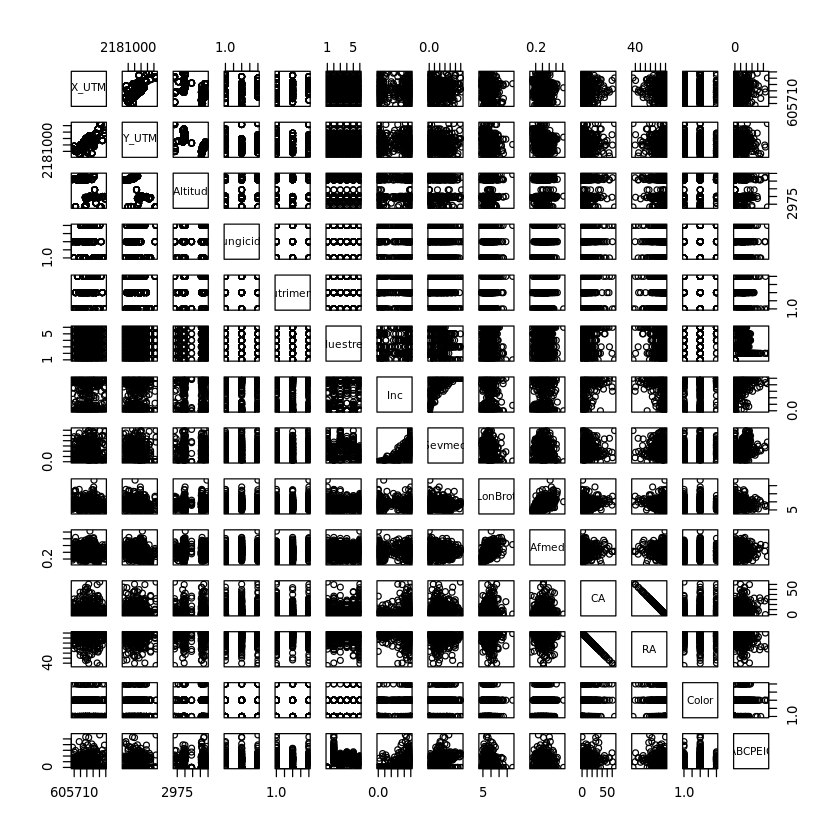


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




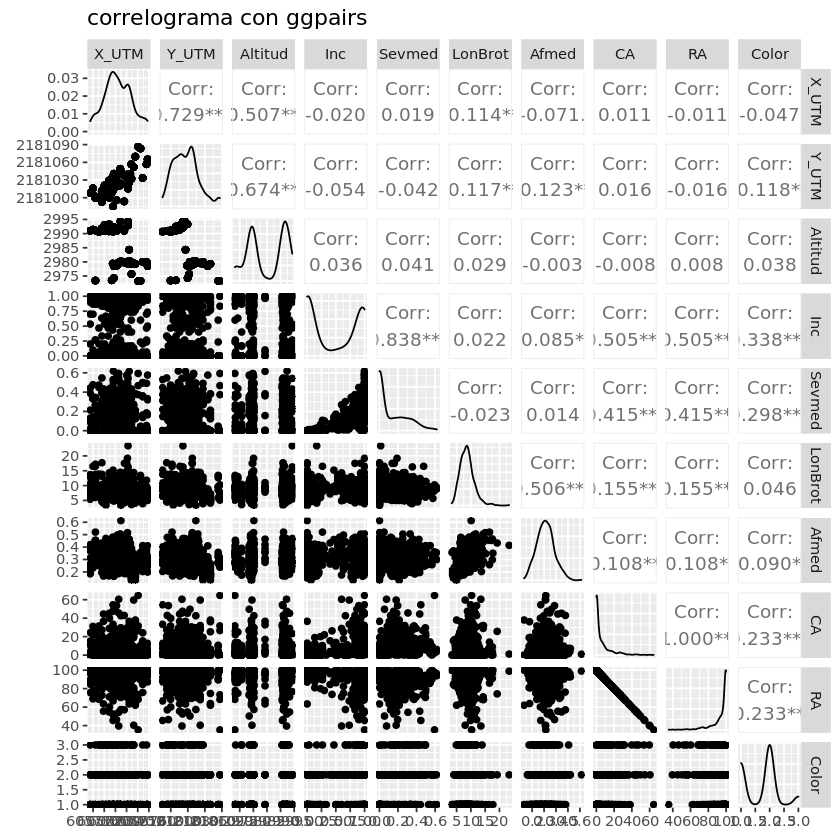

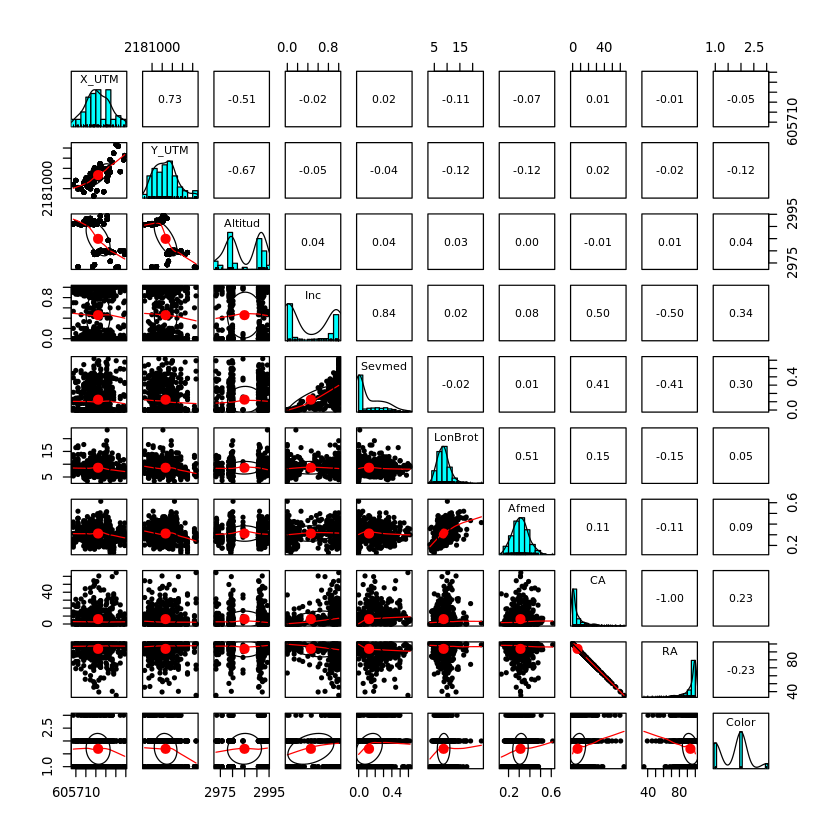

In [4]:
options(warn=-1)
#base de datos
summary(base)
class(base)
str(base)

#matriz de diagramas de dispersion
pairs(base[,c(5,6,7,9,10,12,18,19,22,24,28:30,32)])

library(ggplot2)
library(GGally)
ggpairs(base[,c(5,6,7,18,19,22,24,28:30)], 
        title="correlograma con ggpairs") 

library(psych)
psych::pairs.panels(base[,c(5,6,7,18,19,22,24,28:30)])

In [5]:
summary(base$Altitud)
2994-2973

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2973    2979    2982    2985    2991    2994 

[1] 21

Importance of components:
                          PC1    PC2    PC3    PC4     PC5     PC6     PC7
Standard deviation     1.7451 1.5196 1.2216 1.0107 0.88496 0.70241 0.69614
Proportion of Variance 0.3045 0.2309 0.1492 0.1021 0.07832 0.04934 0.04846
Cumulative Proportion  0.3045 0.5354 0.6847 0.7868 0.86512 0.91446 0.96292
                           PC8     PC9      PC10
Standard deviation     0.46896 0.38840 1.265e-10
Proportion of Variance 0.02199 0.01509 0.000e+00
Cumulative Proportion  0.98491 1.00000 1.000e+00

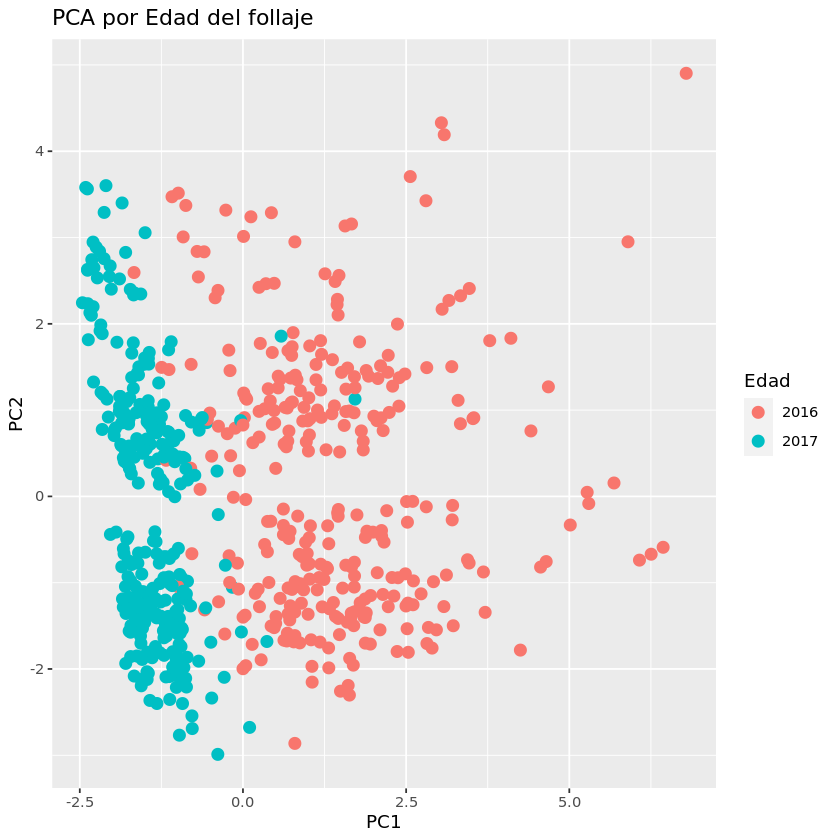

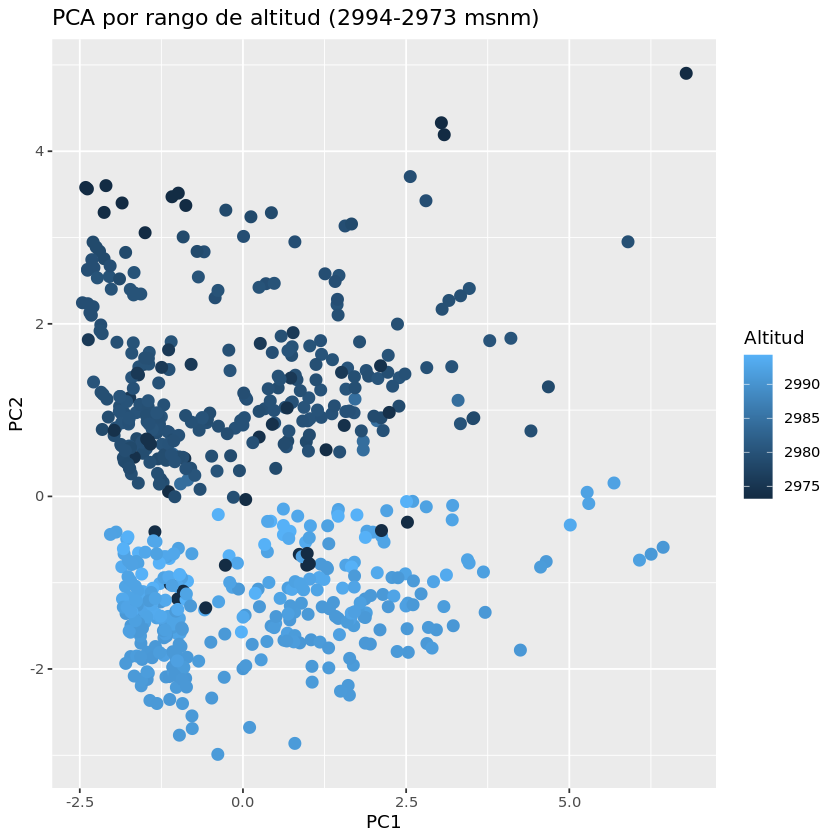

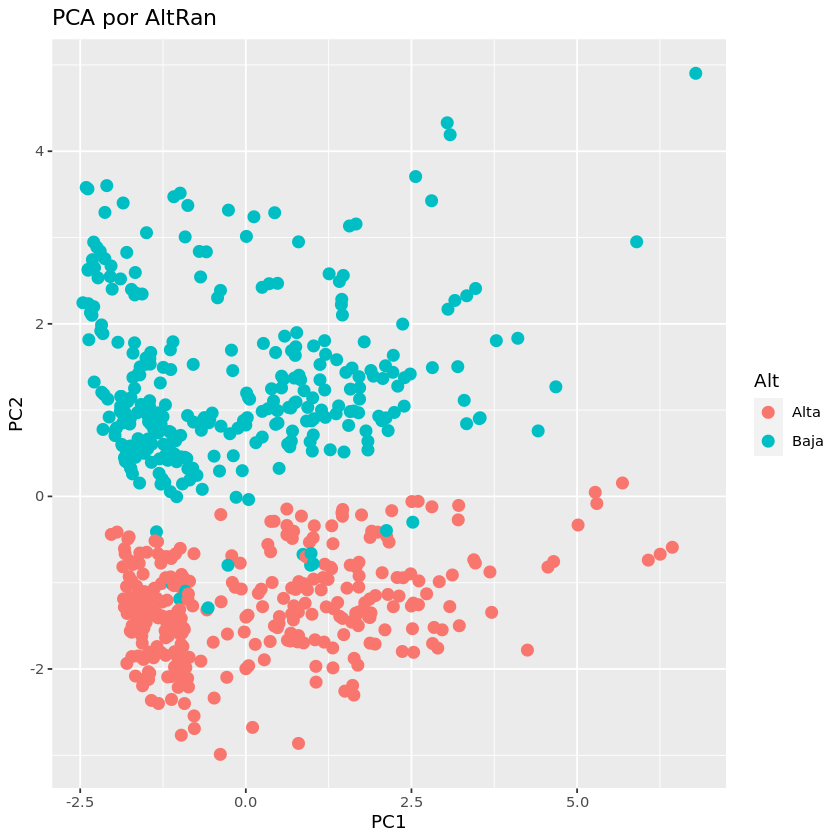

In [6]:
#Análisis de componentes principales 
base.pc<- na.omit(base[,c(14,2,5,6,7,8,18,19,22,24,28:30)])
pca <- prcomp(base.pc[,-c(1,2,6)], scale = T, center=T)
summary(pca)

#biplot
library(ggplot2)
Edad <- as.factor(base.pc$Anio)
ggplot(base.pc, aes(x = pca$x[,1], y = pca$x[,2], colour = Edad)) +
  geom_point(size=3) + xlab("PC1") + ylab("PC2")+
  ggtitle("PCA por Edad del follaje")

#biplot2
library(ggplot2)
ggplot(base.pc, aes(x = pca$x[,1], y = pca$x[,2], colour = Altitud)) +
  geom_point(size=3) + xlab("PC1") + ylab("PC2")+
  ggtitle("PCA por rango de altitud (2994-2973 msnm)")

#biplot3
library(ggplot2)
Alt <- as.factor(base.pc$AltRan)
ggplot(base.pc, aes(x = pca$x[,1], y = pca$x[,2], colour = Alt)) +
  geom_point(size=3) + xlab("PC1") + ylab("PC2")+
  ggtitle("PCA por AltRan")

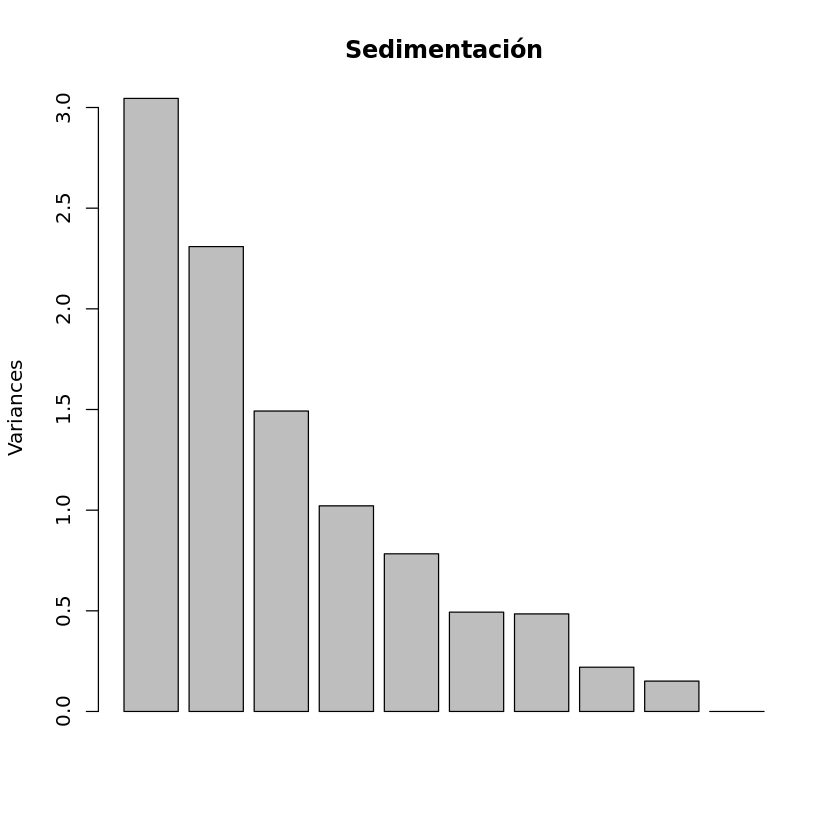

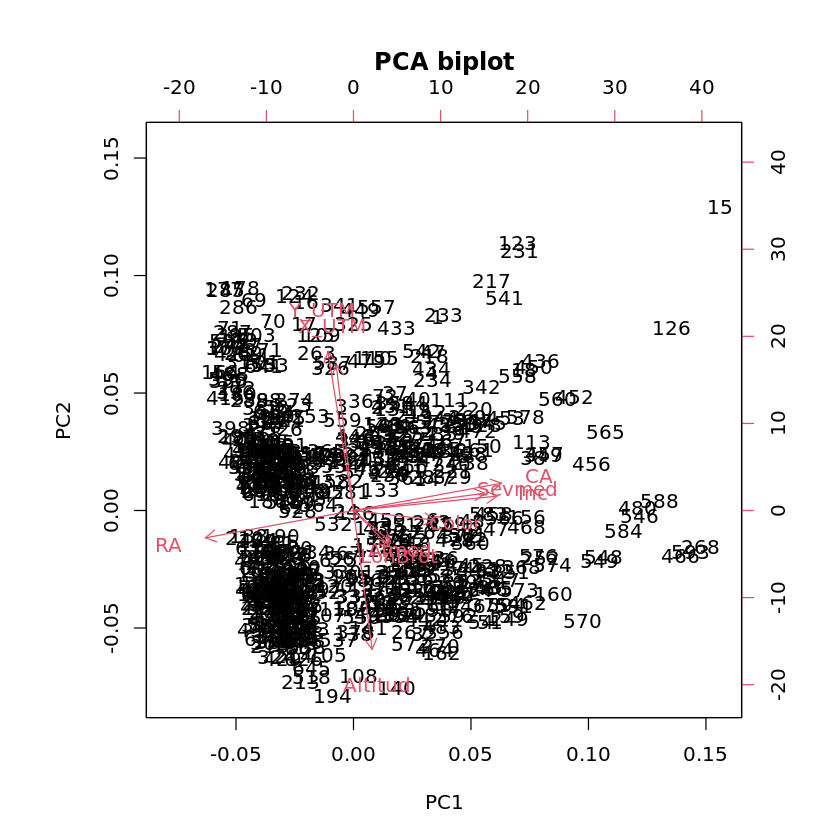

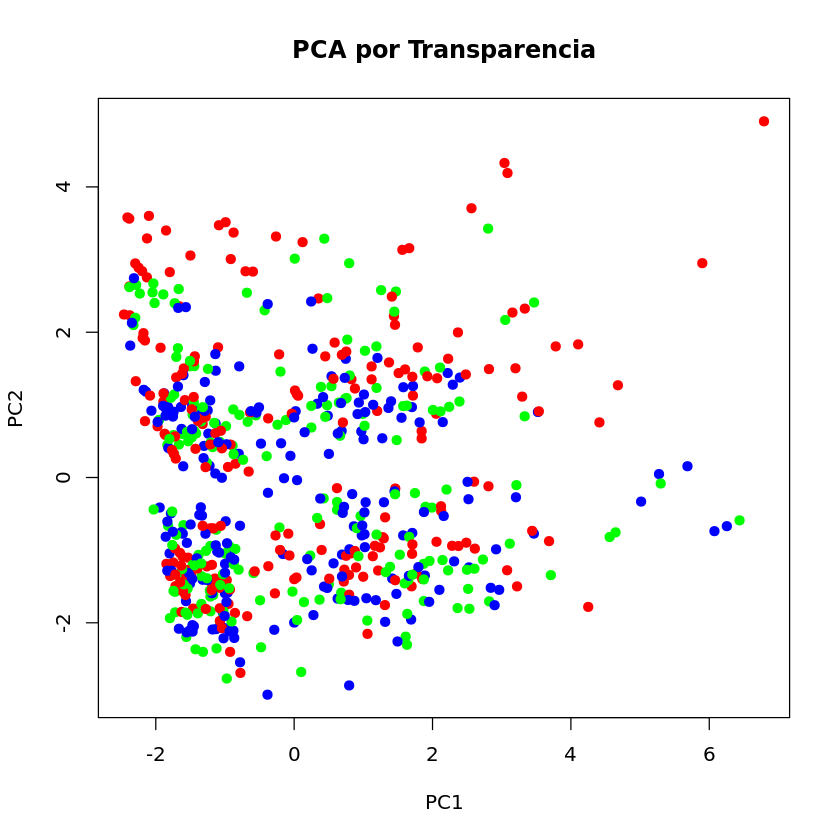

In [7]:
plot(pca,main="Sedimentación")
biplot(pca, main="PCA biplot")

colores <- function(vec){
  # la funci?n rainbow() devuelve un vector que contiene el n?mero de colores distintos
  col <- rainbow(length(unique(vec)))
  return(col[as.numeric(as.factor(vec))])
}

plot(pca$x[,c(1, 2)], col = colores(base$Bloque),
     pch = 19, 
     xlab = "PC1", 
     ylab = "PC2", main="PCA por Transparencia")

**Interpretación:** De acuerdo con el AED y ACP se seleccionaron las variables transparencia de copa, coordenadas UTM (X y Y), altitud, incidencia, severidad, longitud de brote, área de acícula, acículas caidas, acículas retenidas y color de acícula, para implementar las técnicas de ML.


### **2) Random Forest**


 Alta  Baja Media 
  200   216   208 


Call:
 randomForest(formula = Bloque ~ ., data = train, proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 2.28%
Confusion matrix:
      Alta Baja Media class.error
Alta   132    4     1  0.03649635
Baja     0  160     0  0.00000000
Media    4    1   136  0.03546099

Confusion Matrix and Statistics

          Reference
Prediction Alta Baja Media
     Alta   137    0     0
     Baja     0  160     0
     Media    0    0   141

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.9916, 1)
    No Information Rate : 0.3653     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: Alta Class: Baja Class: Media
Sensitivity               1.0000      1.0000       1.0000
Specificity               1.0000      1.0000       1.0000
Pos Pred Value            1.0000      1.0000       1.0000
Neg Pred Value            1.0000      1.0000       1.0000
Prevalence                0.3128      0.3653       0.3219
Detection Rate            0.3128      0.3653       0.3219
Detection Prevalence      0.3128      0.3653    

       
p1      Alta Baja Media
  Alta   137    0     0
  Baja     0  160     0
  Media    0    0   141

[1] 0

Confusion Matrix and Statistics

          Reference
Prediction Alta Baja Media
     Alta    60    0     0
     Baja     2   56     0
     Media    1    0    67

Overall Statistics
                                          
               Accuracy : 0.9839          
                 95% CI : (0.9536, 0.9967)
    No Information Rate : 0.3602          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9758          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: Alta Class: Baja Class: Media
Sensitivity               0.9524      1.0000       1.0000
Specificity               1.0000      0.9846       0.9916
Pos Pred Value            1.0000      0.9655       0.9853
Neg Pred Value            0.9762      1.0000       1.0000
Prevalence                0.3387      0.3011       0.3602
Detection Rate            0.3226      0.3011       0.3602
Det

       
p2      Alta Baja Media
  Alta    60    0     0
  Baja     2   56     0
  Media    1    0    67

[1] 0.01612903

mtry = 3  OOB error = 17.53% 
Searching left ...
mtry = 6 	OOB error = 8.42% 
0.519802 0.05 
mtry = 12 	OOB error = 3.04% 
0.6390171 0.05 
mtry = 24 	OOB error = 2.36% 
0.2224409 0.05 
mtry = 48 	OOB error = 4.83% 
-1.04665 0.05 
Searching right ...
mtry = 1 	OOB error = 47.96% 
-19.30272 0.05 


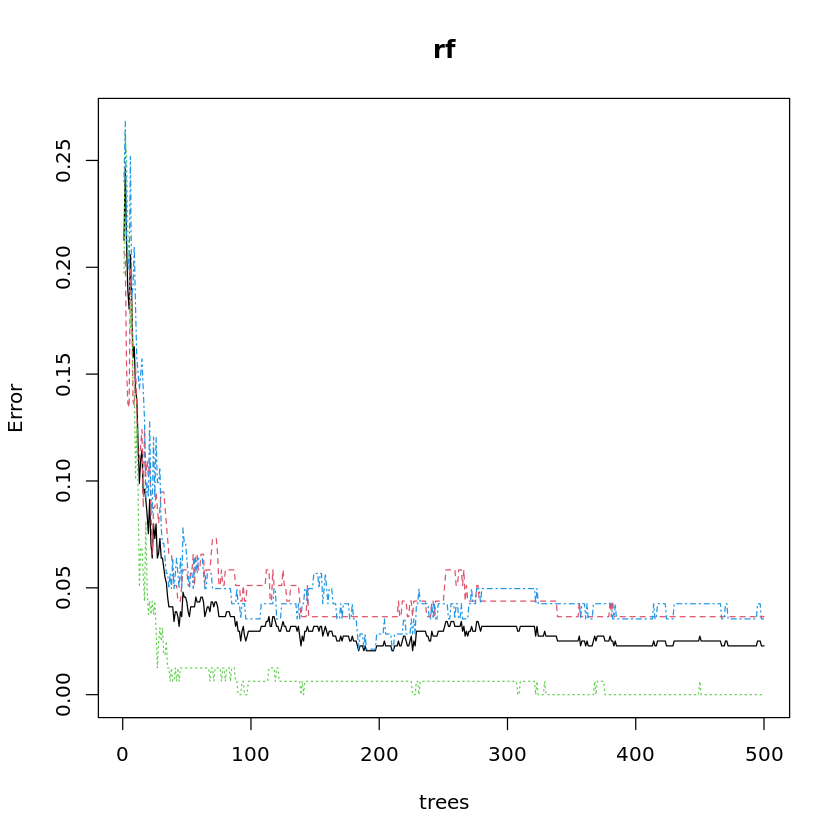

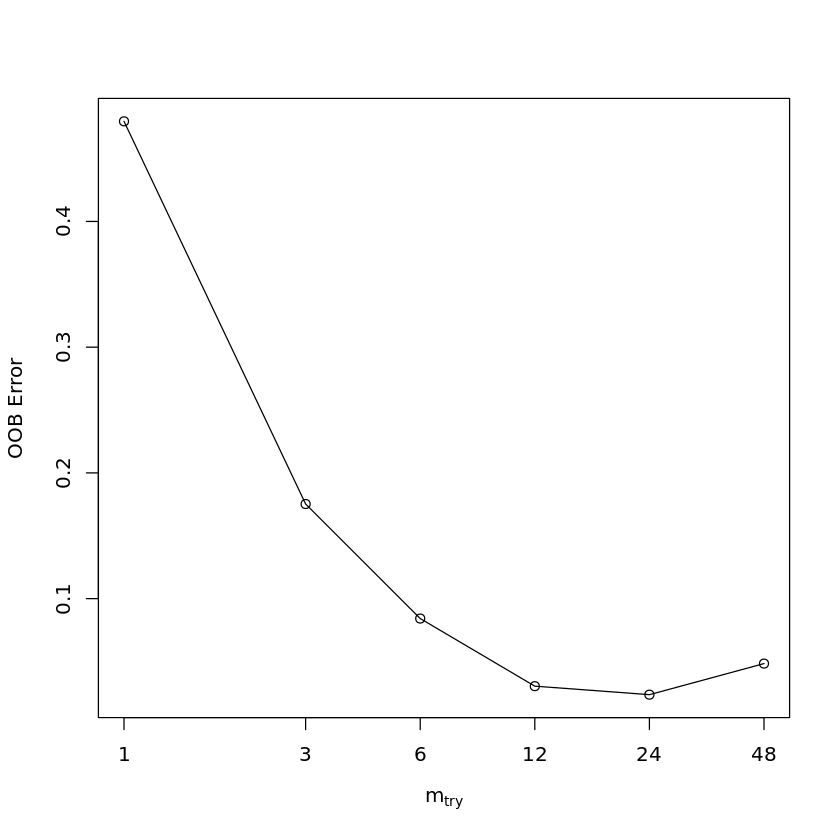

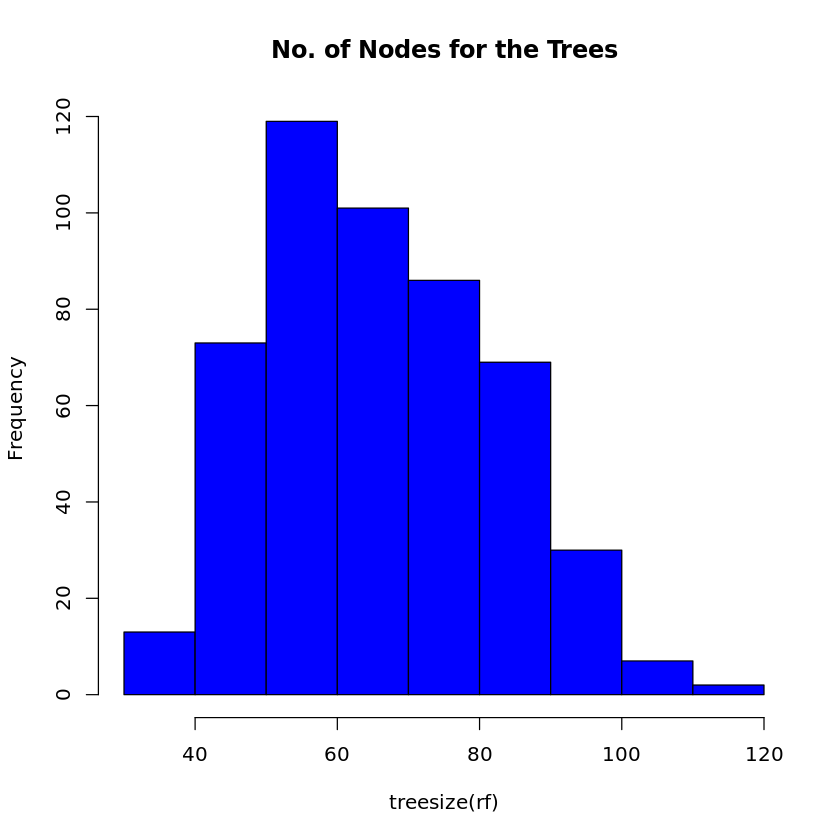

,MeanDecreaseGini
X_UTM,85.378578
Y_UTM,76.219320
Altitud,54.328330
Inc,5.457896
Sevmed,8.613401
LonBrot,20.168919
Afmed,20.634459
CA,8.147649
RA,8.153187
Color,3.360461


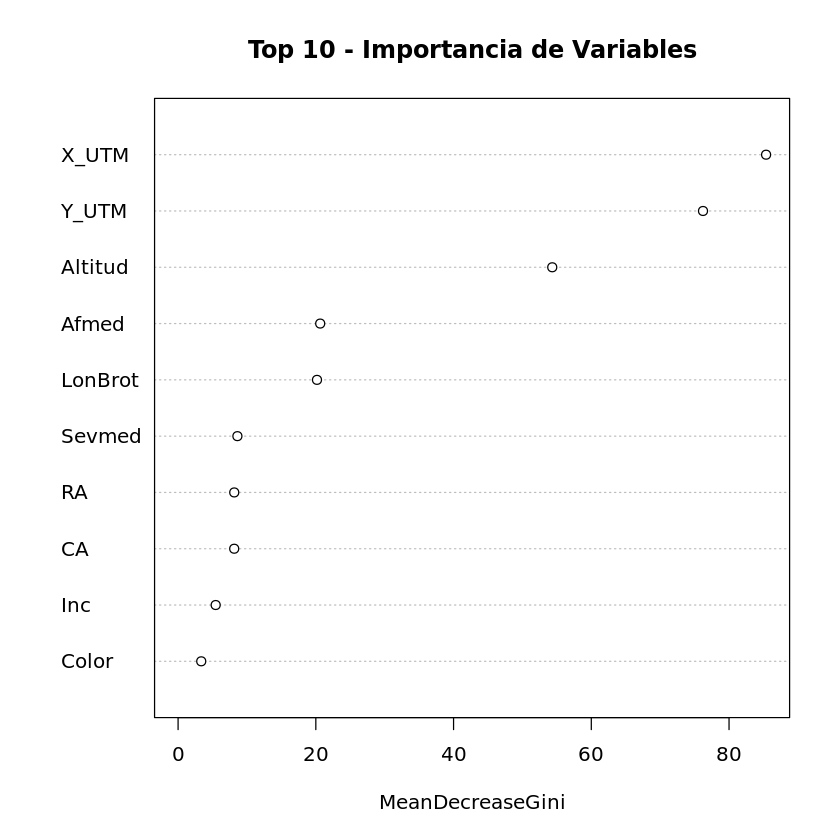

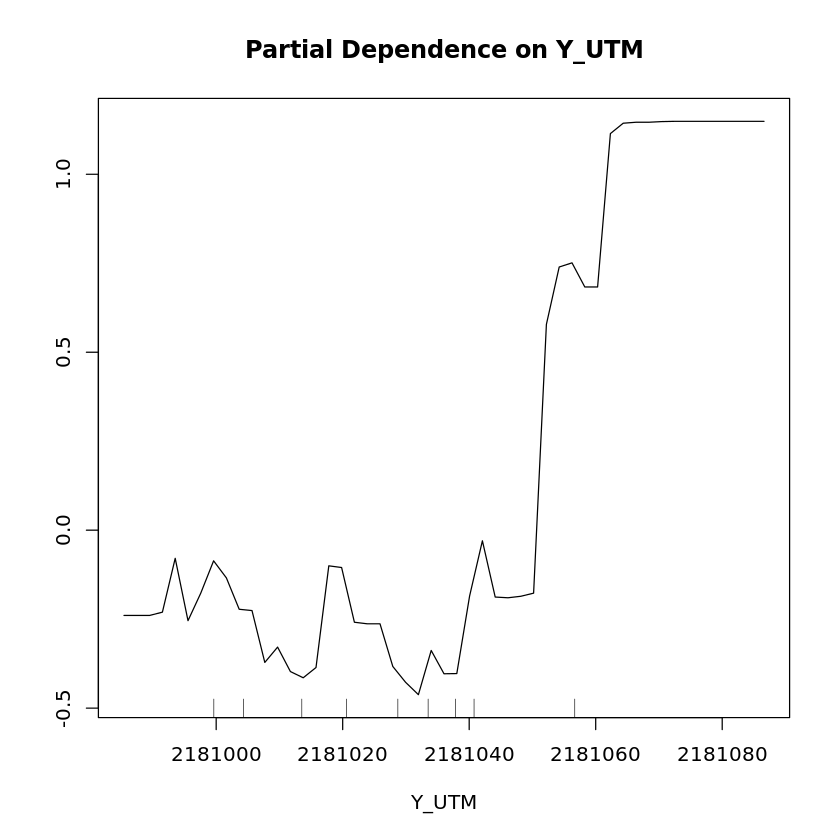

In [11]:
options(warn=-1)
library(randomForest)
library(caret)

#Getting Data
base_rf <- na.omit(base[,c(2,5,6,7,18,19,22,24,28:30)])

base_rf$Bloque <- as.factor(base_rf$Bloque)
table(base_rf$Bloque)

#Data Partition
set.seed(123)
ind <- sample(2, nrow(base_rf), replace = TRUE, prob = c(0.7, 0.3))
train <- base_rf[ind==1,]
test <- base_rf[ind==2,]

#Random Forest in R
rf <- randomForest(Bloque~., data=train, proximity=TRUE) 
rf

#Confusion Matrix and Statistics
p1 <- predict(rf, train)
confusionMatrix(p1, train$Bloque)
(tab1 <- table(p1, train$Bloque))
1 - sum(diag(tab1)) / sum(tab1)
#error del 0%


p2 <- predict(rf, test)
confusionMatrix(p2, test$Bloque)
(tab2 <- table(p2, test$Bloque))
1 - sum(diag(tab2)) / sum(tab2)
#error del 0%



#Error rate of Random Forest
plot(rf)

#Tune mtry (Número de variables aleatorias utilizadas en cada árbol)
t <- tuneRF(train[,-1], train[,1],
            stepFactor = 0.5,
            plot = TRUE,
            ntreeTry = 5,
            trace = TRUE,
            improve = 0.05)
#mtry=6

#No. of nodes for the trees
hist(treesize(rf),
     main = "No. of Nodes for the Trees",
     col = "blue")
#media de 60 árboles

#Variable Importance
varImpPlot(rf,
           sort = T,
           n.var = 10,
           main = "Top 10 - Importancia de Variables")
importance(rf)

#Partial Dependence Plot
partialPlot(rf, train, Y_UTM, "Alta")

**Interpretación:** se obtuvo una precisión del 98% y un valor $\kappa$= 0.98, una
mtry (Número de variables aleatorias utilizadas en cada árbol) de 6, 60 nodos promedio por árbol, las variables de mayor peso son las coordenadas UTM (X y Y).

### **3) Naive Bayes**


Attaching package: ‘dplyr’


The following object is masked from ‘package:randomForest’:

    combine


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union





 Alta  Baja Media 
  200   216   208 

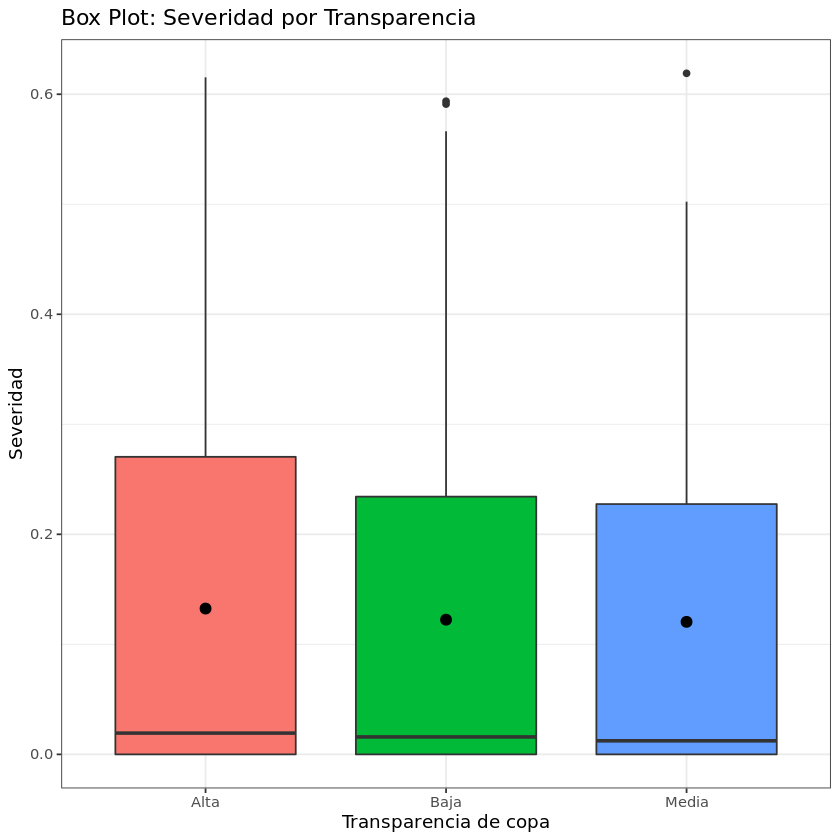

In [12]:
options(warn=-1)
#clasificacion en datos poco correlacionados
#https://www.r-bloggers.com/2021/04/naive-bayes-classification-in-r/
#Para segmentar imagenes (severidad)
#https://plantcv.readthedocs.io/en/latest/tutorials/machine_learning_tutorial/

library(dplyr)
library(ggplot2)


base_nb <- na.omit(base[,c(2,5,6,7,18,19,22,24,28:30)])

#Dplyr
base_nb$Bloque <- as.factor(base_nb$Bloque)
table(base_nb$Bloque)

base_nb %>%
  ggplot(aes(x=base_nb$Bloque,
  y=base_nb$Sevmed, fill = base_nb$Bloque)) +
  geom_boxplot() +theme_bw()+stat_summary(fun="mean")+
  ggtitle("Box Plot: Severidad por Transparencia")+
  xlab("Transparencia de copa") + ylab("Severidad")+
  theme(legend.position="none")


naivebayes 0.9.7 loaded




================================== Naive Bayes ================================== 
 
 Call: 
naive_bayes.formula(formula = Bloque ~ ., data = train_nb, usekernel = T)

--------------------------------------------------------------------------------- 
 
Laplace smoothing: 0

--------------------------------------------------------------------------------- 
 
 A priori probabilities: 

     Alta      Baja     Media 
0.3294931 0.3525346 0.3179724 

--------------------------------------------------------------------------------- 
 
 Tables: 

--------------------------------------------------------------------------------- 
 ::: X_UTM::Alta (KDE)
--------------------------------------------------------------------------------- 

Call:
	density.default(x = x, na.rm = TRUE)

Data: x (143 obs.);	Bandwidth 'bw' = 4.234

       x                y            
 Min.   :605708   Min.   :6.845e-05  
 1st Qu.:605724   1st Qu.:5.646e-03  
 Median :605740   Median :1.531e-02  
 Mean   :605740   Mean

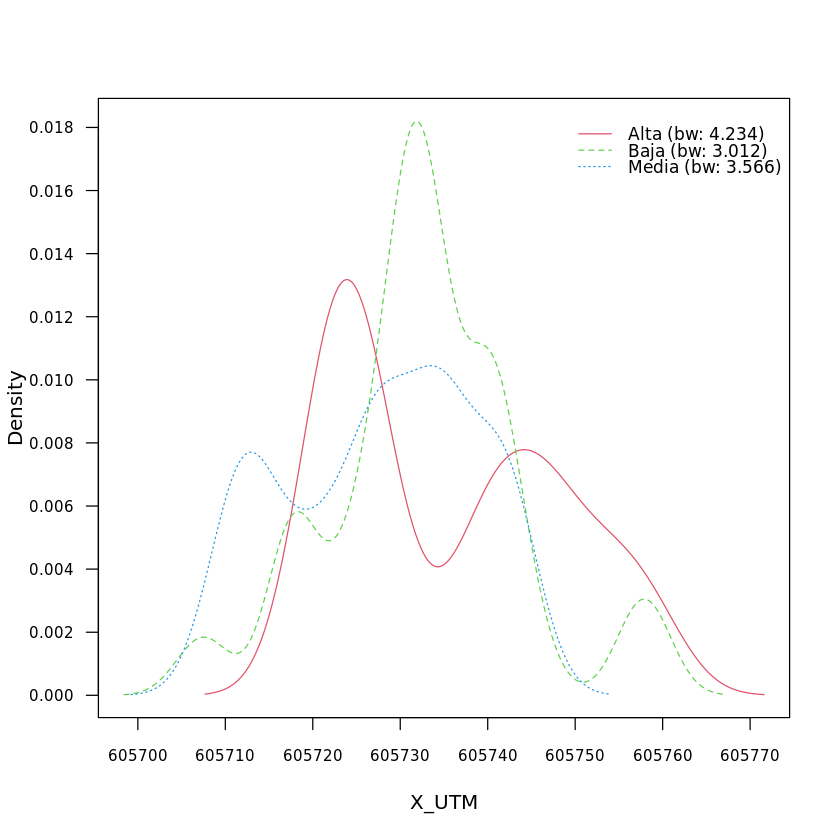

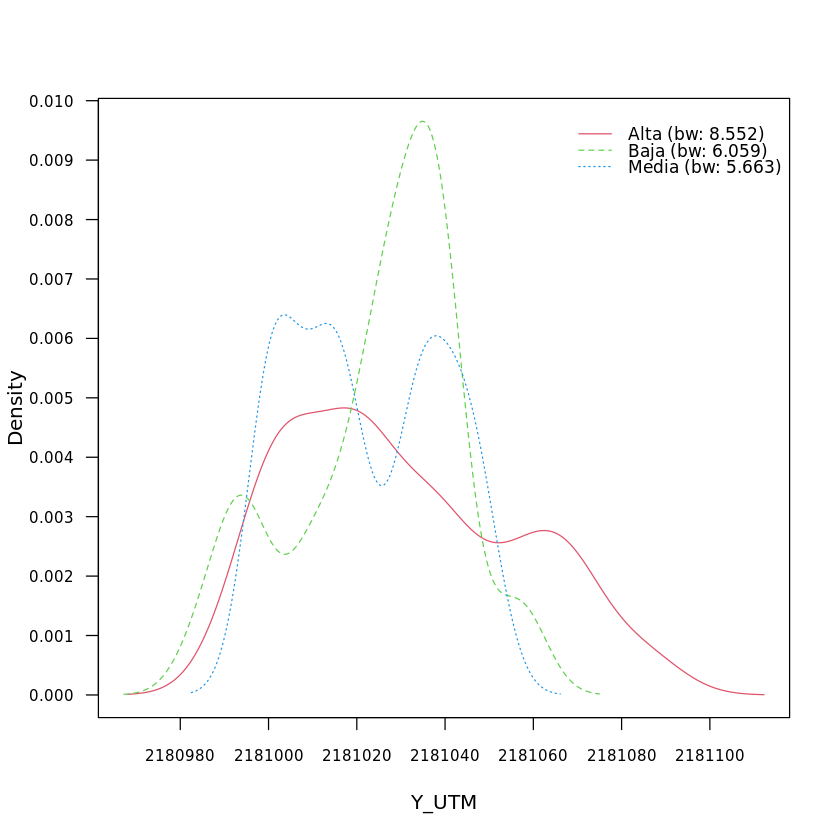

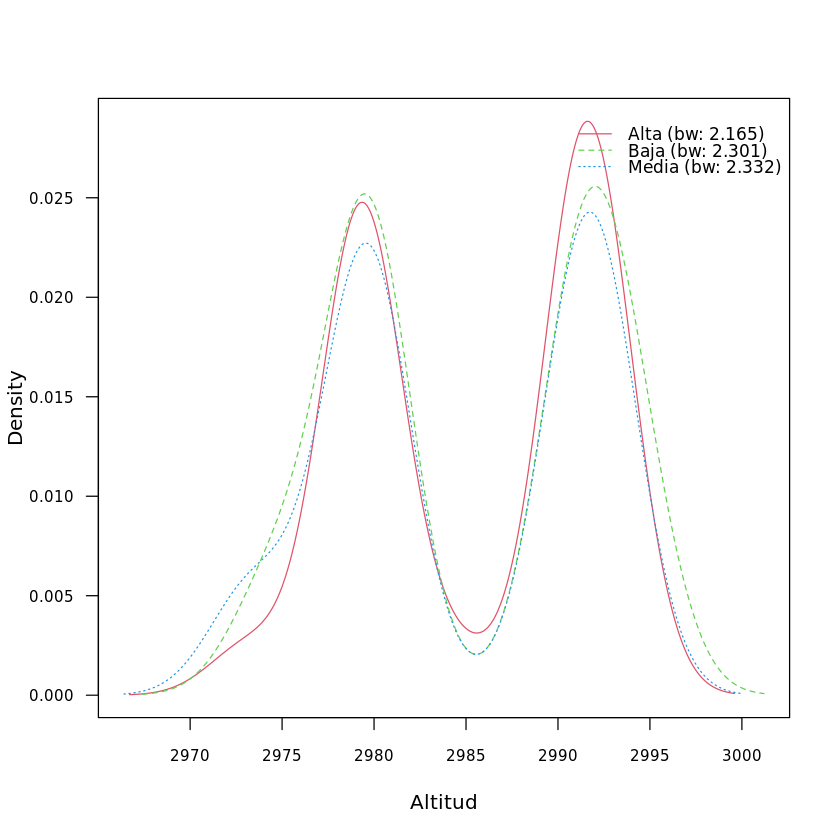

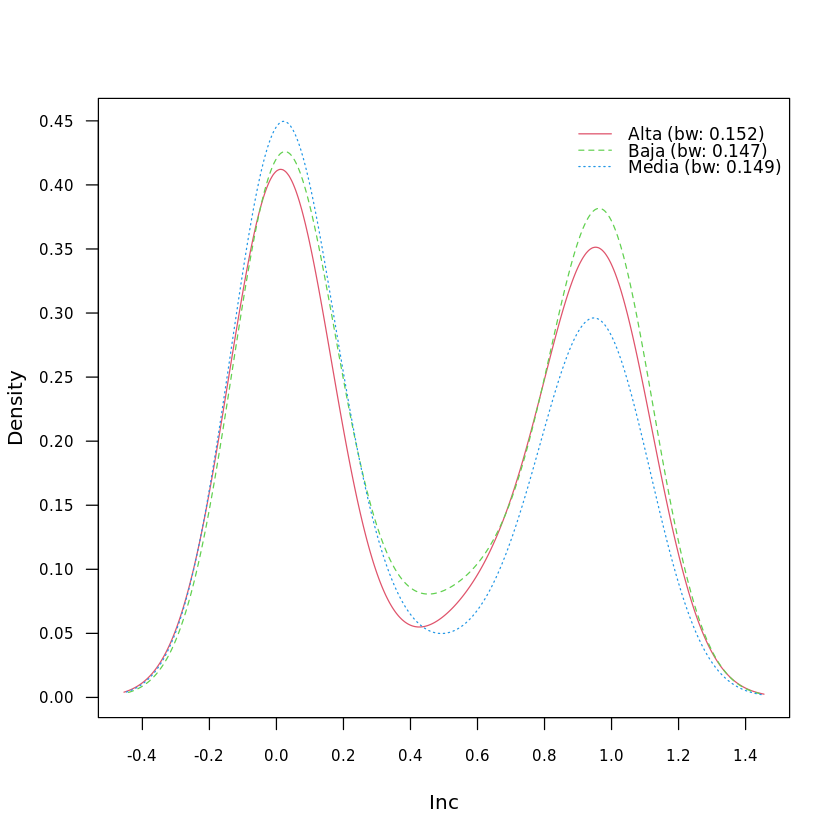

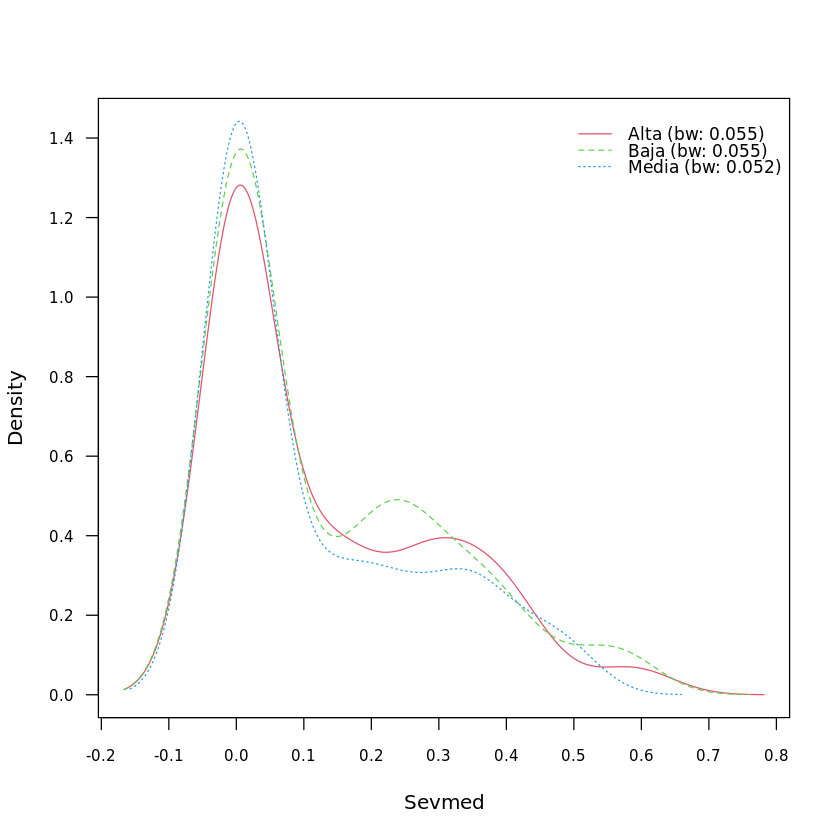

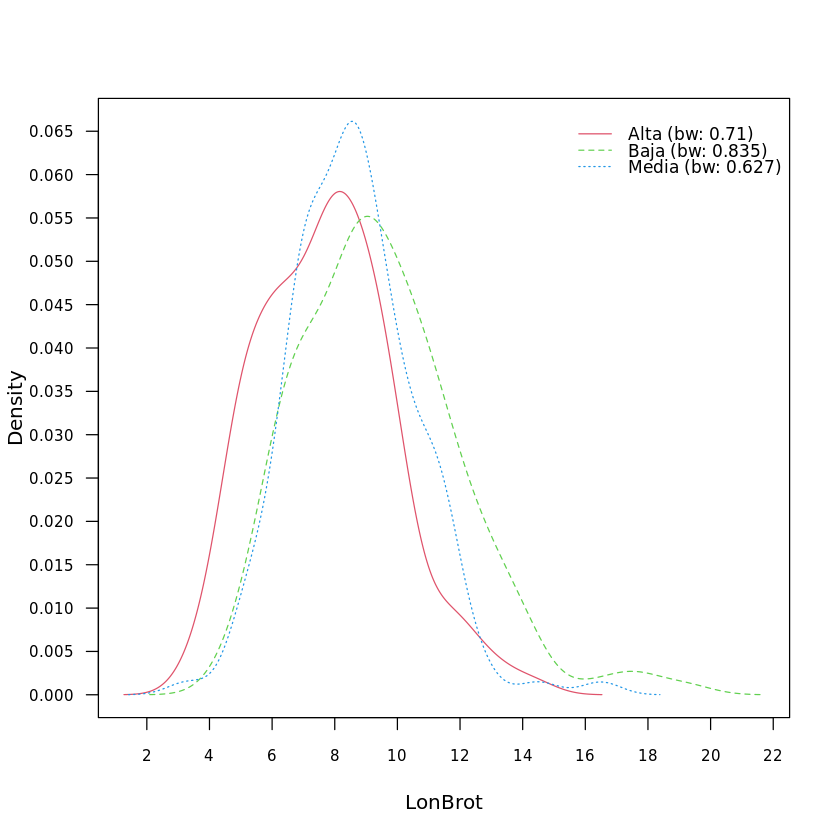

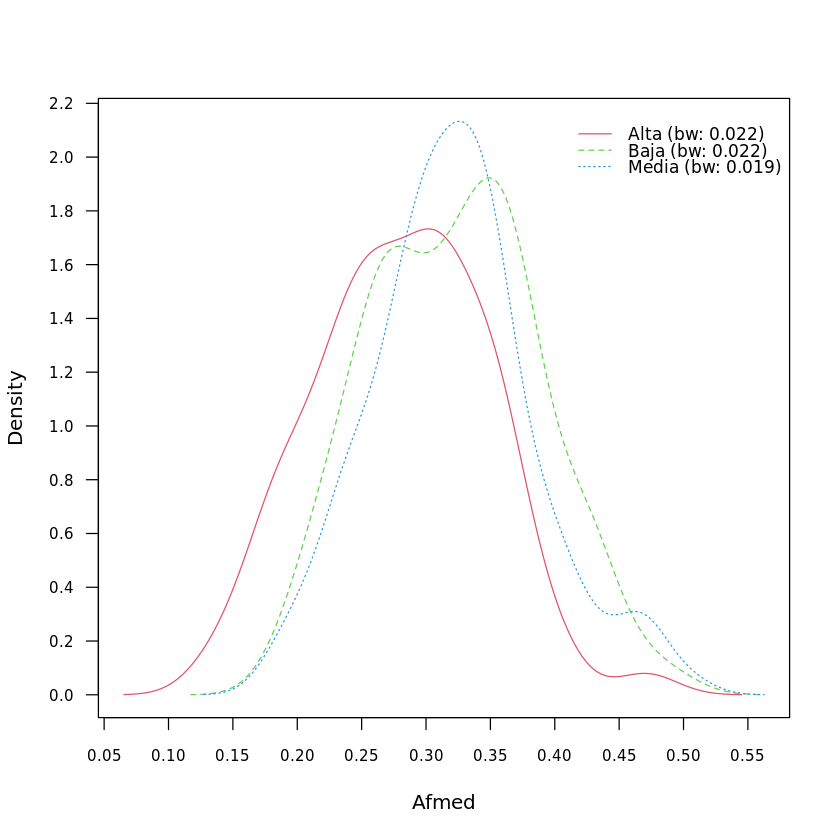

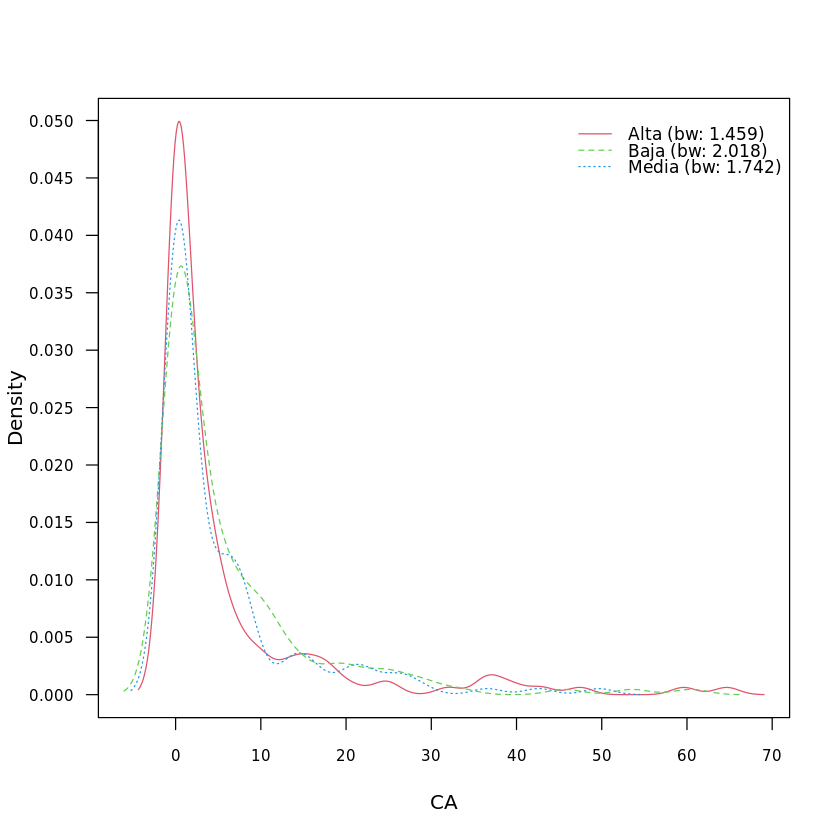

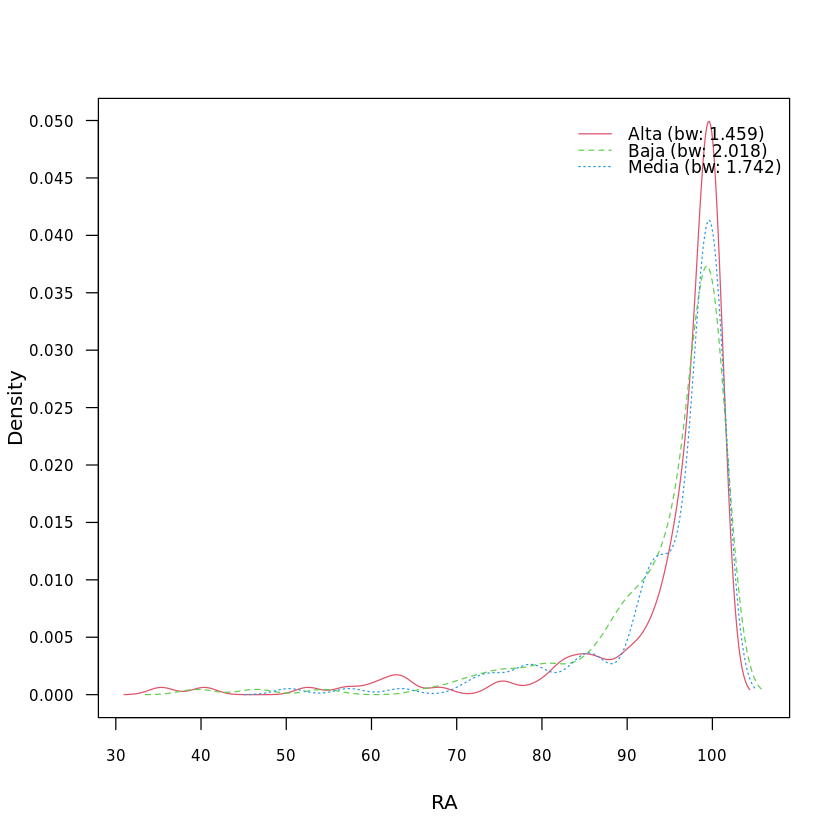

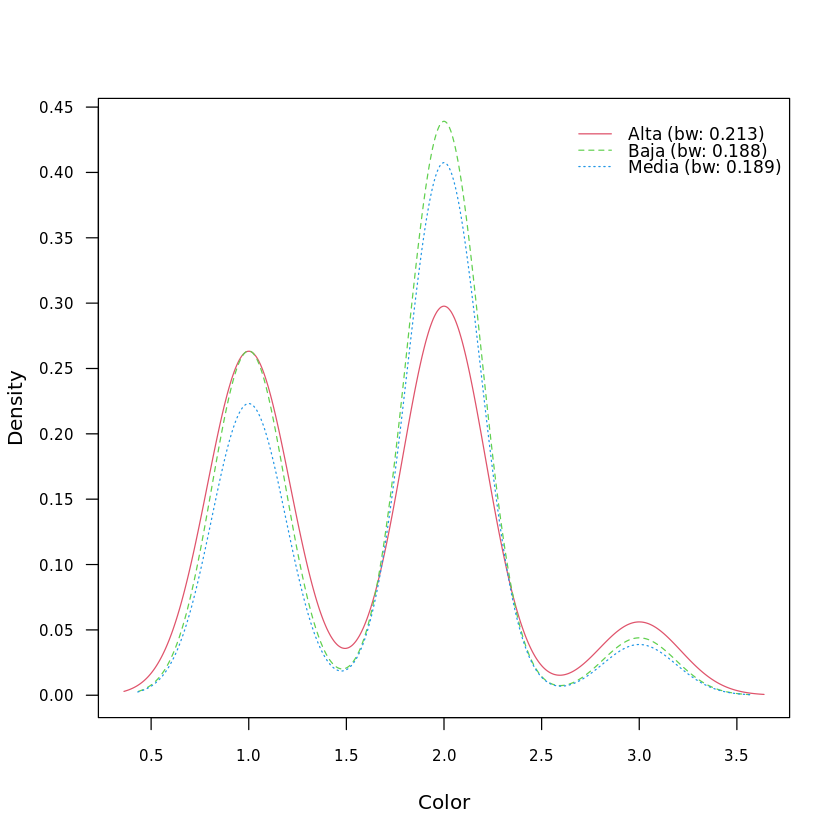

In [13]:
library(naivebayes)
library(lattice)
#particion de datos
set.seed(1234)
ind <- sample(2, nrow(base_nb), replace = T, prob = c(0.7, 0.3))
train_nb <- base_nb[ind == 1,]
test_nb <- base_nb[ind == 2,]

nb <- naive_bayes(Bloque ~ ., data = train_nb, usekernel = T) 
nb 

plot(nb) 

**Interpretación:** se obtuvo una precisión de 49% y un valor de $\kappa$=0.23.
En general esta técnica no fue tan buena para clasificar la transparencia de copa.


### **4) K-NN**

In [14]:
#https://rpubs.com/JairoAyala/601703

options(warn=-1)
library(kknn)

base_knn <- na.omit(base[,c(2,5,6,7,9,10,12,18,19,22,24,28:30,32)])

base_knn$Bloque <- as.factor(base_knn$Bloque)
table(base_knn$Bloque)


set.seed(2020)
muestra <- sample(1:624, 437)
train_knn <- base_knn[muestra,]#70%
test_knn<- base_knn[-muestra,]#30%
dim(train_knn)[1]
dim(test_knn)[1]

knn <- train.kknn(Bloque~ ., data = train_knn, kmax = 9)
knn

entre <- predict(knn, train_knn[,-1])
tt  <- table(train_knn[,1],entre)
tt

precision <- (sum(diag(tt)))/sum(tt)
precision

#precisión del 100 % en datos de entrenamiento


#Precisión test de prueba
pred    <- predict(knn, test_knn[,-1])
table   <- table(test_knn[,1],pred)
table


clas    <- (sum(diag(table)))/sum(table)
clas

#Precisión del 53% de datos de prueba

#matriz de confusion con la prueba

library(caret)
confusionMatrix(pred,test_knn$Bloque)


Attaching package: ‘kknn’


The following object is masked from ‘package:caret’:

    contr.dummy





 Alta  Baja Media 
  200   216   208 

[1] 437

[1] 187


Call:
train.kknn(formula = Bloque ~ ., data = train_knn, kmax = 9)

Type of response variable: nominal
Minimal misclassification: 0.5102975
Best kernel: optimal
Best k: 9

       entre
        Alta Baja Media
  Alta   129    5     5
  Baja    16  122    15
  Media    7    7   131

[1] 0.8741419

       pred
        Alta Baja Media
  Alta    35   13    13
  Baja    13   29    21
  Media   12   16    35

[1] 0.5294118

Confusion Matrix and Statistics

          Reference
Prediction Alta Baja Media
     Alta    35   13    12
     Baja    13   29    16
     Media   13   21    35

Overall Statistics
                                          
               Accuracy : 0.5294          
                 95% CI : (0.4552, 0.6026)
    No Information Rate : 0.3369          
    P-Value [Acc > NIR] : 4.914e-08       
                                          
                  Kappa : 0.294           
                                          
 Mcnemar's Test P-Value : 0.8695          

Statistics by Class:

                     Class: Alta Class: Baja Class: Media
Sensitivity               0.5738      0.4603       0.5556
Specificity               0.8016      0.7661       0.7258
Pos Pred Value            0.5833      0.5000       0.5072
Neg Pred Value            0.7953      0.7364       0.7627
Prevalence                0.3262      0.3369       0.3369
Detection Rate            0.1872      0.1551       0.1872
Det

**Interpretación:** se obtuvo una precisión de 53% y un valor de $\kappa$=0.30.
En general esta técnica no fue tan buena para clasificar la transparencia de copa.

### **5) Curvas Receiver Operating Characteristic (ROC)**

[[1]]
[1] 0.9993548

[[1]]
[1] 1

[[1]]
[1] 1



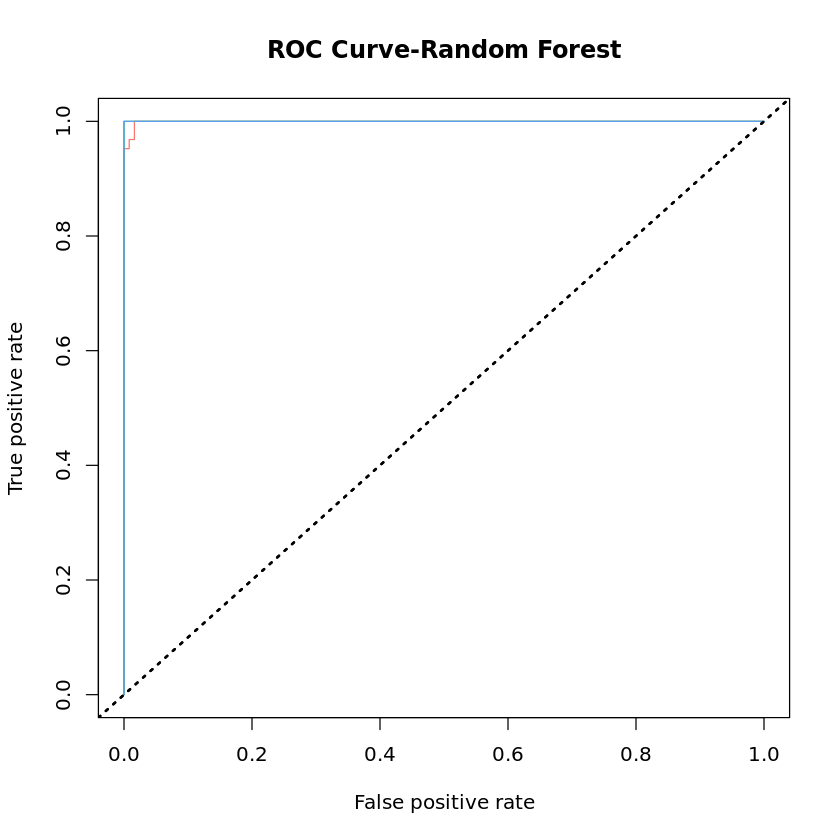

[[1]]
[1] 0.7632238

[[1]]
[1] 0.6860392

[[1]]
[1] 0.702381



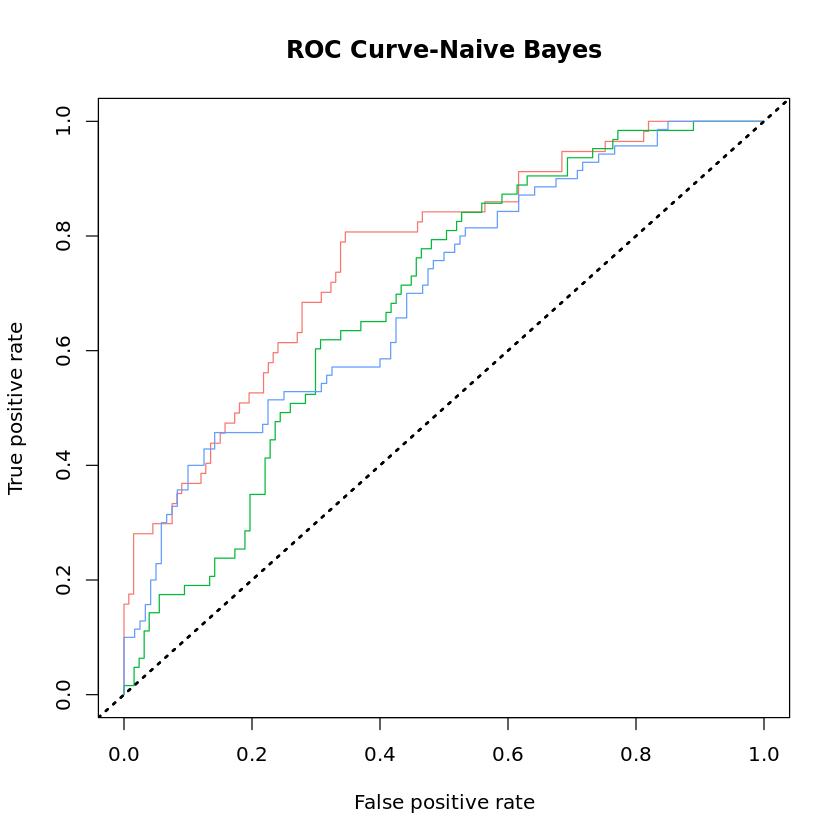

[[1]]
[1] 0.7848686

[[1]]
[1] 0.6751792

[[1]]
[1] 0.7210061



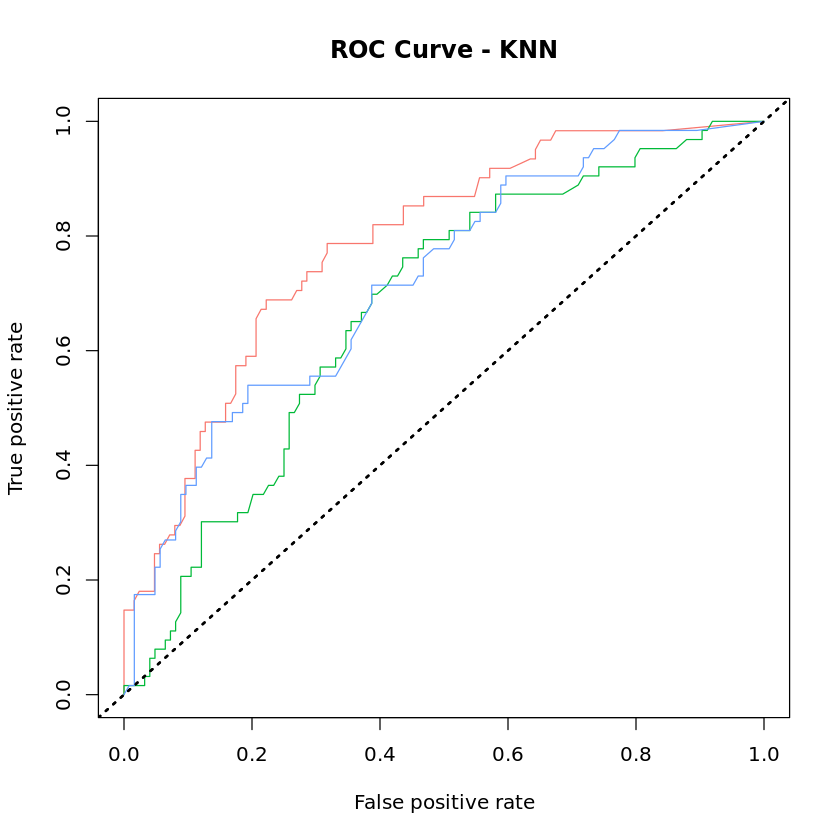

In [16]:
#Random forest
# Validation set assessment #2: ROC curves and AUC
# Needs to import ROCR package for ROC curve plotting:
library(ROCR)
# Calculate the probability of new observations belonging to each class
# prediction_for_roc_curve will be a matrix with dimensions data_set_size x number_of_classes
prediction_for_roc_curve <- stats::predict(rf,test[,-1],type="prob")
# Use pretty colours:
pretty_colours <- c("#F8766D","#00BA38","#619CFF")
# Specify the different classes 
test$Bloque <- as.factor(test$Bloque)
classes <- levels(test$Bloque)
# For each class
for (i in 1:3)
{
  # Define which observations belong to class[i]
  true_values <- ifelse(test[,1]==classes[i],1,0)
  # Assess the performance of classifier for class[i]
  pred <- prediction(prediction_for_roc_curve[,i],true_values)
  perf <- performance(pred, "tpr", "fpr")
  if (i==1)
  {
    plot(perf,main="ROC Curve-Random Forest",col=pretty_colours[i]) 
  }
  else
  {
    plot(perf,main="ROC Curve- Random Forest",col=pretty_colours[i],add=TRUE)
    abline (a = 0, b = 1, lty="dotted", lwd=2) 
  }
  # Calculate the AUC and print it to screen
  auc.perf <- performance(pred, measure = "auc")
  print(auc.perf@y.values)
}


#Naive Bayes (ROC)

# Validation set assessment #2: ROC curves and AUC
# Needs to import ROCR package for ROC curve plotting:
library(ROCR)
# Calculate the probability of new observations belonging to each class
# prediction_for_roc_curve will be a matrix with dimensions data_set_size x number_of_classes
prediction_for_roc_curve <- stats::predict(nb,test_nb[,-1],type="prob")
# Use pretty colours:
pretty_colours <- c("#F8766D","#00BA38","#619CFF")
# Specify the different classes 
test_nb$Bloque <- as.factor(test_nb$Bloque)
classes <- levels(test_nb$Bloque)
# For each class
for (i in 1:3)
{
  # Define which observations belong to class[i]
  true_values <- ifelse(test_nb[,1]==classes[i],1,0)
  # Assess the performance of classifier for class[i]
  pred <- prediction(prediction_for_roc_curve[,i],true_values)
  perf <- performance(pred, "tpr", "fpr")
  if (i==1)
  {
    plot(perf,main="ROC Curve-Naive Bayes",col=pretty_colours[i]) 
  }
  else
  {
    plot(perf,main="ROC Curve-Naive Bayes",col=pretty_colours[i],add=TRUE)
    abline (a = 0, b = 1, lty="dotted", lwd=2) 
  }
  # Calculate the AUC and print it to screen
  auc.perf <- performance(pred, measure = "auc")
  print(auc.perf@y.values)
}


#KNN (ROC)

# Validation set assessment #2: ROC curves and AUC
# Needs to import ROCR package for ROC curve plotting:
library(ROCR)
# Calculate the probability of new observations belonging to each class
# prediction_for_roc_curve will be a matrix with dimensions data_set_size x number_of_classes
prediction_for_roc_curve <- stats::predict(knn,test_knn[,-1],type="prob")
# Use pretty colours:
pretty_colours <- c("#F8766D","#00BA38","#619CFF")
# Specify the different classes 
test_knn$Bloque <- as.factor(test_knn$Bloque)
classes <- levels(test_knn$Bloque)
# For each class
for (i in 1:3)
{
  # Define which observations belong to class[i]
  true_values <- ifelse(test_knn[,1]==classes[i],1,0)
  # Assess the performance of classifier for class[i]
  pred <- prediction(prediction_for_roc_curve[,i],true_values)
  perf <- performance(pred, "tpr", "fpr")
  if (i==1)
  {
    plot(perf,main="ROC Curve - KNN",col=pretty_colours[i]) 
  }
  else
  {
    plot(perf,main="ROC Curve -KNN",col=pretty_colours[i],add=TRUE)
    abline (a = 0, b = 1, lty="dotted", lwd=2) 
  }
  # Calculate the AUC and print it to screen
  auc.perf<- performance(pred, measure = "auc")
  print(auc.perf@y.values)
}

**Interpretación:** De acuerdo la evaluación de las curvas ROC, es evidente qu el mejor modelo para clasificar a la transparencia de copa de Douglas-fir fue Random Forest, ya que tuvo mayor cantidad de positivos verdaderos en comparación con Naive Bayes y K-NN, donde se pueden considerar que son modelos de regulares a malos.


### **6) Comparación de métricas para validación**

In [17]:
p <-rbind(c(0.98,0.49,0.53)) 
k <- rbind(c(0.98,0.23,0.30))
r <- rbind(c(1.00, 0.70, 0.72))
pres <- rbind(p,k,r)
pres <- as.data.frame(pres)
colnames(pres) <- c("Random Forest","Naive Bayes", "K-NN")
pres <- cbind(Métrica=c("Precisión(%)","Kappa", "AUC-ROC"),pres)
pres

Métrica,Random Forest,Naive Bayes,K-NN
<chr>,<dbl>,<dbl>,<dbl>
Precisión(%),0.98,0.49,0.53
Kappa,0.98,0.23,0.30
AUC-ROC,1.00,0.70,0.72


### **7) Conclusiones**

De acuerdo la evaluación de las curvas ROC, precisión y valor de kappa, es evidente que el mejor modelo para clasificar a la transparencia de copa de Douglas-fir fue Random Forest, además tuvo mayor cantidad de positivos verdaderos con sensibilidad, especificidad y precisión equilibrada en comparación de Naive Bayes y K-NN, donde se pueden considerar que son modelos de regulares a malos para clasificar la transparencia de copa.

## **Bibliografía**

- finnstats. Naive Bayes Classification in R | R-Bloggers. 9 de abril de 2021, https://www.r-bloggers.com/2021/04/naive-bayes-classification-in-r/

- finnstats. Random Forest in R | R-Bloggers. 13 de abril de 2021, https://www.r-bloggers.com/2021/04/random-forest-in-r/

- Gandhi, Rohith. Naive Bayes Classifier. Medium, 17 de mayo de 2018, https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c  

- K-NN Classifier in R Programming». GeeksforGeeks, 18 de junio de 2020, https://www.geeksforgeeks.org/k-nn-classifier-in-r-programming/ 

- Naive Bayes Classifier in R Programming. GeeksforGeeks, 18 de junio de 2020, https://www.geeksforgeeks.org/naive-bayes-classifier-in-r-programming/ 

- Quiroz, I. I. F. 2019. Tolerancia al tizón suizo en una plantación de árboles de navidad en Aquixtla, Puebla. Tesis de Maestría. Programa en Ciencias Forestales. Colegio de Postgraduados. 101 p http://colposdigital.colpos.mx:8080/jspui/handle/10521/3571

- RPubs - KNN. https://rpubs.com/JairoAyala/601703. Accedido 20 de noviembre de 2022
